In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## MINST DATA

In [3]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=tensor_transform
)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

## AutoEncoder Class

In [4]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [5]:
model = autoencoder()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)
epochs = 20
outputs = []
losses = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Cuda Avalible")
model.to(device)

Cuda Avalible


autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Sigmoid()
  )
)

## Training

In [6]:
for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)

        reconstructed = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.6f}")

Epoch 1/20, Loss: 0.045209
Epoch 2/20, Loss: 0.032404
Epoch 3/20, Loss: 0.032828
Epoch 4/20, Loss: 0.030903
Epoch 5/20, Loss: 0.030705
Epoch 6/20, Loss: 0.023714
Epoch 7/20, Loss: 0.028729
Epoch 8/20, Loss: 0.028268
Epoch 9/20, Loss: 0.023094
Epoch 10/20, Loss: 0.025789
Epoch 11/20, Loss: 0.022928
Epoch 12/20, Loss: 0.020450
Epoch 13/20, Loss: 0.024569
Epoch 14/20, Loss: 0.027991
Epoch 15/20, Loss: 0.018892
Epoch 16/20, Loss: 0.019346
Epoch 17/20, Loss: 0.021993
Epoch 18/20, Loss: 0.018580
Epoch 19/20, Loss: 0.024133
Epoch 20/20, Loss: 0.022357


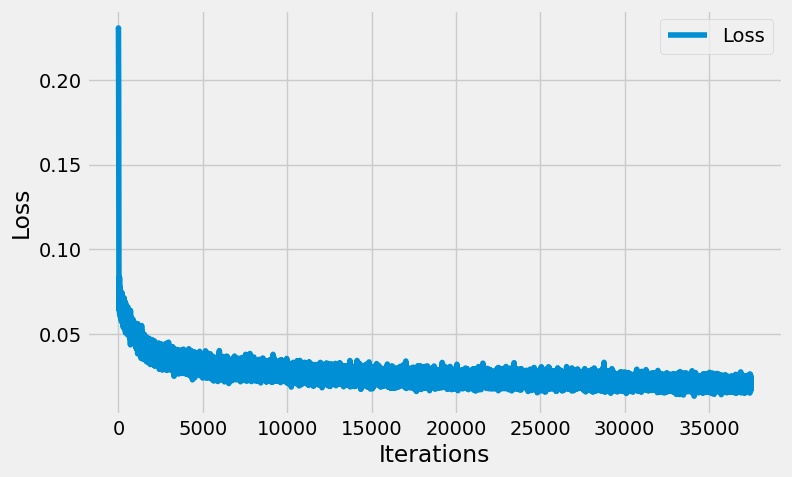

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

In [ ]:
torch.save(model.state_dict(), "output/autoencoder_weights.pth")
torch.save(model, "output/autoencoder_model.pth")
print("Saved")

Saved
